<a href="https://colab.research.google.com/github/frasgado/Analisis_Censo_2020/blob/main/03_Analisis_HyMporEstado_CENSO2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PORCENTAJE HOMBRES Y MUJERES POR ENTIDAD FEDERATIVA**
**CENSO 2020**

---



In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

RUTA = '/content/drive/MyDrive/CENSO2020'

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/CENSO2020/conjunto_de_datos_iter_00_cpv2020.csv', index_col=0)
df_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,4767,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,3268,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,93,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


## Verificación de datos

In [ ]:
df_1.shape

(195662, 230)

In [ ]:
#  Contabilizar los valores perdidos en cada columna
missing_values_count = df_1.isnull().sum() 
print(f'No. Total de Registros: {len(df_1)}')
print('----------------------------------------')
print('columna     | No. de Registros NULOS')
print('----------------------------------------')
# Visualizar cantidad de faltantes en cada columnas que conforman el dataset:
missing_values_count.head(60)
# missing_values_count

No. Total de Registros: 195662
----------------------------------------
columna     | No. de Registros NULOS
----------------------------------------


NOM_ENT          0
MUN              0
NOM_MUN          0
LOC              0
NOM_LOC          0
LONGITUD      6230
LATITUD       6230
ALTITUD       6230
POBTOT           0
POBFEM           0
POBMAS           0
P_0A2            0
P_0A2_F          0
P_0A2_M          0
P_3YMAS          0
P_3YMAS_F        0
P_3YMAS_M        0
P_5YMAS          0
P_5YMAS_F        0
P_5YMAS_M        0
P_12YMAS         0
P_12YMAS_F       0
P_12YMAS_M       0
P_15YMAS         0
P_15YMAS_F       0
P_15YMAS_M       0
P_18YMAS         0
P_18YMAS_F       0
P_18YMAS_M       0
P_3A5            0
P_3A5_F          0
P_3A5_M          0
P_6A11           0
P_6A11_F         0
P_6A11_M         0
P_8A14           0
P_8A14_F         0
P_8A14_M         0
P_12A14          0
P_12A14_F        0
P_12A14_M        0
P_15A17          0
P_15A17_F        0
P_15A17_M        0
P_18A24          0
P_18A24_F        0
P_18A24_M        0
P_15A49_F        0
P_60YMAS         0
P_60YMAS_F       0
P_60YMAS_M       0
REL_H_M        213
POB0_14     

In [ ]:
missing_values_count.tail(60)


PSIN_RELIG     0
TOTHOG         0
HOGJEF_F       0
HOGJEF_M       0
POBHOG         0
PHOGJEF_F      0
PHOGJEF_M      0
VIVTOT         0
TVIVHAB        0
TVIVPAR        0
VIVPAR_HAB     0
TVIVPARHAB     0
VIVPAR_DES     0
VIVPAR_UT      0
OCUPVIVPAR     0
PROM_OCUP      0
PRO_OCUP_C     0
VPH_PISODT     0
VPH_PISOTI     0
VPH_1DOR       0
VPH_2YMASD     0
VPH_1CUART     0
VPH_2CUART     0
VPH_3YMASC     0
VPH_C_ELEC     0
VPH_S_ELEC     0
VPH_AGUADV     0
VPH_AEASP      0
VPH_AGUAFV     0
VPH_TINACO     0
VPH_CISTER     0
VPH_EXCSA      0
VPH_LETR       0
VPH_DRENAJ     0
VPH_NODREN     0
VPH_C_SERV     0
VPH_NDEAED     0
VPH_DSADMA     0
VPH_NDACMM     0
VPH_SNBIEN     0
VPH_REFRI      0
VPH_LAVAD      0
VPH_HMICRO     0
VPH_AUTOM      0
VPH_MOTO       0
VPH_BICI       0
VPH_RADIO      0
VPH_TV         0
VPH_PC         0
VPH_TELEF      0
VPH_CEL        0
VPH_INTER      0
VPH_STVP       0
VPH_SPMVPI     0
VPH_CVJ        0
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC    

In [ ]:
# Identificar las columnas que contienen valores nulos
cols_with_missing = missing_values_count[missing_values_count>0] 
cols_with_missing

LONGITUD    6230
LATITUD     6230
ALTITUD     6230
REL_H_M      213
PROM_HNV     210
dtype: int64

In [ ]:
# ¿Qué % de valores perdidos hay sobre el total de valores?
#   Contamos el total de datos (celdas):
total_cells = np.product(df_1.shape)

# Contamos el total de valores perdidos, sumando todos los 
# valores de la variable que contiene los perdidos para cada columna:
total_missing = missing_values_count.sum()
# Calcular el PORCENTAJE:
porc_missing = total_missing/total_cells*100
print(f'El PORCENTAJE de valores perdidos es: {round(porc_missing,2)}')
print(f'De un Total de Registros: {len(df_1)}')

El PORCENTAJE de valores perdidos es: 0.04
De un Total de Registros: 195662


In [ ]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar camel case format
    '''
    return column_name.lower().strip().replace(' ', '_')


df_1 = df_1.rename(columns=clean_column_names)

In [ ]:
df_1.head()

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,p_12a14_f,...,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,tamloc
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,4767,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,3268,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,93,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


In [ ]:
df_1.describe()

,mun,loc,pobtot,vivtot,tvivhab
count,195662.000000,195662.000000,1.956620e+05,1.956620e+05,1.956620e+05
mean,59.699400,623.572221,2.582252e+03,9.000329e+02,7.218171e+02
std,81.370934,1502.609425,2.931486e+05,1.019782e+05,8.195072e+04
min,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,12.000000,45.000000,4.000000e+00,2.000000e+00,1.000000e+00
50%,33.000000,162.000000,1.600000e+01,7.000000e+00,4.000000e+00
75%,73.000000,531.000000,1.470000e+02,5.400000e+01,3.800000e+01
max,570.000000,9999.000000,1.260140e+08,4.390344e+07,3.523346e+07


##Filtraciones de datos

In [ ]:
df_1_filtrado = df_1[df_1['nom_loc'] == 'Total de la Entidad']
df_1_filtrado

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,p_12a14_f,...,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,tamloc
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
2,Baja California,0,Total de la entidad Baja California,0,Total de la Entidad,NaN,NaN,NaN,3769020,1868431,1900589,149957,74010,75947,3610844,1790298,1820546,3494500,1732417,1762083,3069620,1524170,1545450,2882498,1432330,1450168,2698908,1342615,1356293,175286,86624,88662,365938,179504,186434,434167,212675,221492,187122,91840,...,798841,59355,189174,892967,1132622,8947,1117719,1069538,23823,122201,71176,1091956,44752,1101573,39745,1085176,3062,1087646,332788,5204,1086226,946647,730313,800176,66156,155157,740452,1071379,576454,576806,1080169,800189,618175,384011,216865,41223,38772,293529,9582,*
3,Baja California Sur,0,Total de la entidad Baja California Sur,0,Total de la Entidad,NaN,NaN,NaN,798447,392568,405879,35963,17821,18142,758642,372818,385824,732150,359663,372487,637296,313087,324209,597552,293482,304070,557976,274334,283642,39870,19707,20163,81476,40024,41452,94845,46621,48224,39744,19605,...,154268,31013,38337,168738,235285,2826,226124,210742,11973,195709,64637,230755,5610,231864,6170,220917,450,229382,73154,1493,219805,164034,115666,161315,18099,28452,142908,214312,108948,91750,226517,148723,136538,67961,36197,14508,8675,77223,2608,*
4,Campeche,0,Total de la entidad Campeche,0,Total de la Entidad,NaN,NaN,NaN,928363,471424,456939,45541,22506,23035,878528,446774,431754,845134,430162,414972,730335,373837,356498,682951,350650,332301,637189,328098,309091,50104,24850,25254,98089,48087,50002,112766,55251,57515,47384,23187,...,142732,38000,57062,163902,255453,3516,248625,223034,10343,188401,52939,245200,5610,245656,13279,236503,889,243050,128025,5559,218630,201206,86222,89762,64350,62159,136266,226163,87769,68843,218322,114020,151613,38508,17976,23627,36397,130361,12028,*
5,Coahuila de Zaragoza,0,Total de la entidad Coahuila de Zaragoza,0,Total de la Entidad,NaN,NaN,NaN,3146771,1583102,1563669,160368,79095,81273,2980244,1500922,1479322,2860700,1441917,1418783,2475441,1252864,1222577,2316332,1174267,1142065,2157771,1096368,1061403,177691,87469,90222,327112,160589,166523,375447,184431,191016,159109,78597,...,677432,14549,74407,809324,895921,2396,889513,859115,8789,598397,122510,882547,11349,886984,11235,879659,538,880714,321539,2308,870949,780014,574724,554420,67634,167028,642682,863515,367970,372132,824291,519599,443659,195883,124077,17020,46420,332298,5754,*
6,Colima,0,Total de la entidad Colima,0,Total de la Entidad,NaN,NaN,NaN,731391,370769,360622,29614,14483,15131,699821,355305,344516,677122,344007,333115,592408,302457,289951,556272,284755,271517,520033,266970,253063,34469,17025,17444,72944,35823,37121,85323,41826,43497,36136,17702,...,152586,11457,420

In [ ]:
df_1_filtrado = df_1_filtrado[['nom_ent', 'pobtot', 'pobfem', 'pobmas']]
df_1_filtrado


,nom_ent,pobtot,pobfem,pobmas
ENTIDAD,,,,
1,Aguascalientes,1425607,728924,696683
2,Baja California,3769020,1868431,1900589
3,Baja California Sur,798447,392568,405879
4,Campeche,928363,471424,456939
5,Coahuila de Zaragoza,3146771,1583102,1563669
6,Colima,731391,370769,360622
7,Chiapas,5543828,2837881,2705947
8,Chihuahua,3741869,1888047,1853822
9,Ciudad de México,9209944,4805017,4404927


In [ ]:
df_1_filtrado

,nom_ent,pobtot,pobfem,pobmas
ENTIDAD,,,,
1,Aguascalientes,1425607,728924,696683
2,Baja California,3769020,1868431,1900589
3,Baja California Sur,798447,392568,405879
4,Campeche,928363,471424,456939
5,Coahuila de Zaragoza,3146771,1583102,1563669
6,Colima,731391,370769,360622
7,Chiapas,5543828,2837881,2705947
8,Chihuahua,3741869,1888047,1853822
9,Ciudad de México,9209944,4805017,4404927


## Transformaciones de Datos

In [ ]:
# Identificando tipos de datos
df_1_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nom_ent  32 non-null     object
 1   pobtot   32 non-null     int64 
 2   pobfem   32 non-null     object
 3   pobmas   32 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [ ]:
#Datos sin redondeos
#df_1_filtrado['mujeres'] = df_1_filtrado.groupby(['pobfem','pobtot'], group_keys=False).apply(lambda g: (g.pobfem.astype(float)/g.pobtot) * 100) 
#df_1_filtrado['hombres'] = df_1_filtrado.groupby(['pobmas','pobtot'], group_keys=False).apply(lambda g: (g.pobmas.astype(float)/g.pobtot) * 100) 

#Datos redondeados
df_1_filtrado['mujeres'] = df_1_filtrado.groupby(['pobfem','pobtot'], group_keys=False).apply(lambda g: round((g.pobfem.astype(float)/g.pobtot) * 100,2)) 
df_1_filtrado['hombres'] = df_1_filtrado.groupby(['pobmas','pobtot'], group_keys=False).apply(lambda g: round((g.pobmas.astype(float)/g.pobtot) * 100,2)) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_1_filtrado

,nom_ent,pobtot,pobfem,pobmas,mujeres,hombres
ENTIDAD,,,,,,
1,Aguascalientes,1425607,728924,696683,51.13,48.87
2,Baja California,3769020,1868431,1900589,49.57,50.43
3,Baja California Sur,798447,392568,405879,49.17,50.83
4,Campeche,928363,471424,456939,50.78,49.22
5,Coahuila de Zaragoza,3146771,1583102,1563669,50.31,49.69
6,Colima,731391,370769,360622,50.69,49.31
7,Chiapas,5543828,2837881,2705947,51.19,48.81
8,Chihuahua,3741869,1888047,1853822,50.46,49.54
9,Ciudad de México,9209944,4805017,4404927,52.17,47.83


In [ ]:
df_1_filtrado_2 = df_1_filtrado[['nom_ent', 'mujeres', 'hombres']]
df_1_filtrado_2

,nom_ent,mujeres,hombres
ENTIDAD,,,
1,Aguascalientes,51.13,48.87
2,Baja California,49.57,50.43
3,Baja California Sur,49.17,50.83
4,Campeche,50.78,49.22
5,Coahuila de Zaragoza,50.31,49.69
6,Colima,50.69,49.31
7,Chiapas,51.19,48.81
8,Chihuahua,50.46,49.54
9,Ciudad de México,52.17,47.83


In [ ]:
df_1_filtrado_2 = df_1_filtrado[['nom_ent', 'mujeres', 'hombres']]
tab_df2 = df_1_filtrado_2.sort_values(by=['mujeres','hombres'], ascending=False)
tab_df2 = tab_df2.reset_index()
tab_df2.drop('ENTIDAD', axis=1, inplace=True)
tab_df2

,nom_ent,mujeres,hombres
0,Oaxaca,52.21,47.79
1,Ciudad de México,52.17,47.83
2,Puebla,52.00,48.00
3,Veracruz de Ignacio de la Llave,51.98,48.02
4,Guerrero,51.97,48.03
5,Hidalgo,51.95,48.05
6,Morelos,51.77,48.23
7,Tlaxcala,51.61,48.39
8,México,51.44,48.56
9,Michoacán de Ocampo,51.43,48.57


In [ ]:
df_1_filtrado_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nom_ent  32 non-null     object 
 1   mujeres  32 non-null     float64
 2   hombres  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


In [ ]:
#Desglosar por estado, sexo y %
df_1_filtrado_3 = df_1_filtrado_2.melt(id_vars=['nom_ent'], 
                                       value_vars=['mujeres', 'hombres'], 
                                       var_name='sexo', 
                                       value_name='value')
df_1_filtrado_3.head(60)


,nom_ent,sexo,value
0,Aguascalientes,mujeres,51.13
1,Baja California,mujeres,49.57
2,Baja California Sur,mujeres,49.17
3,Campeche,mujeres,50.78
4,Coahuila de Zaragoza,mujeres,50.31
5,Colima,mujeres,50.69
6,Chiapas,mujeres,51.19
7,Chihuahua,mujeres,50.46
8,Ciudad de México,mujeres,52.17
9,Durango,mujeres,50.63


In [ ]:
# Ordenación por columnas sexo y value(%)
tab_df = df_1_filtrado_3.sort_values(by=['sexo','value'], ascending=False)
tab_df = tab_df.reset_index()
tab_df.drop('index', axis=1, inplace=True)
tab_df


,nom_ent,sexo,value
0,Oaxaca,mujeres,52.21
1,Ciudad de México,mujeres,52.17
2,Puebla,mujeres,52.00
3,Veracruz de Ignacio de la Llave,mujeres,51.98
4,Guerrero,mujeres,51.97
...,...,...,...
59,Guerrero,hombres,48.03
60,Veracruz de Ignacio de la Llave,hombres,48.02
61,Puebla,hombres,48.00
62,Ciudad de México,hombres,47.83


## Visualización de Datos

- Usando matplotlib y seaborn

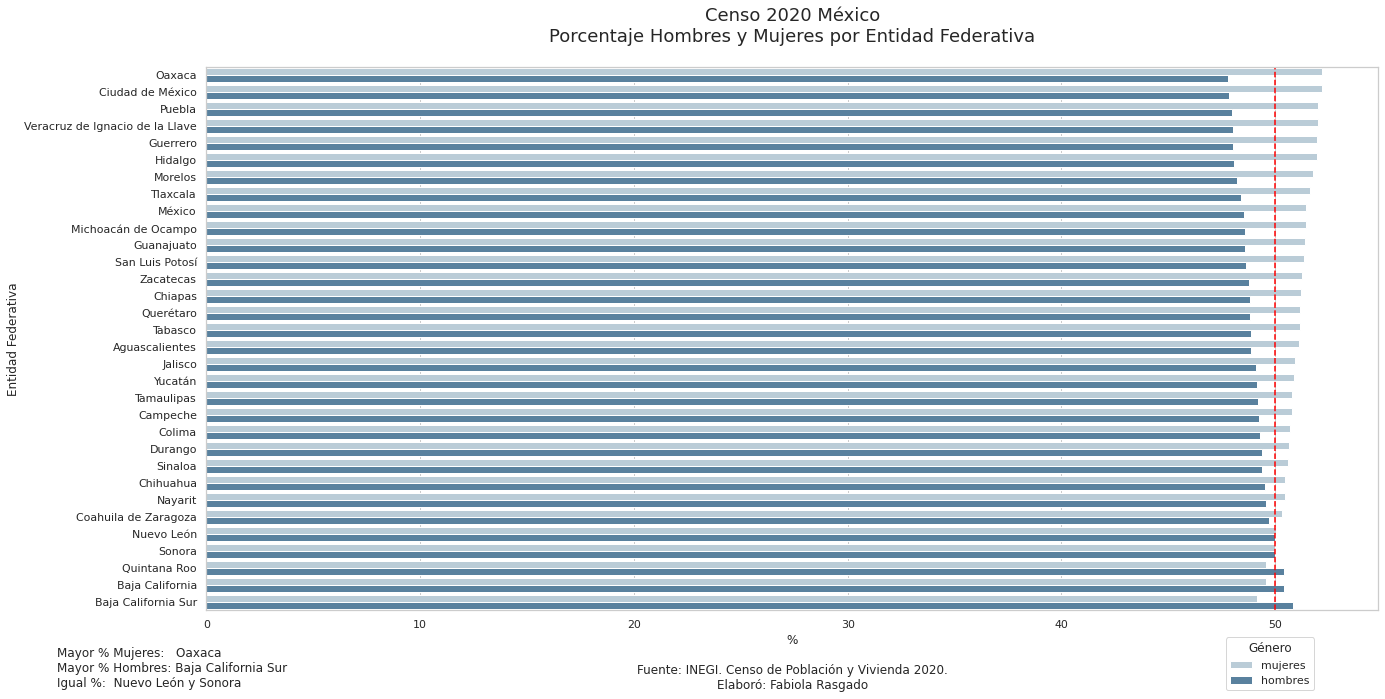

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn')
sns.set_context('paper')
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(21, 10))
ax = sns.barplot(x = 'value', y = 'nom_ent', hue = 'sexo', data = tab_df, 
            palette = 'Blues',  #pastel,Blues_r, Pastel1
            dodge=True, 
            edgecolor = 'w', 
            #color="salmon", 
            saturation=.5)
ax.set_ylabel('Entidad Federativa')
ax.set(xlabel = '%\n\nFuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado')

ax.set_title('Censo 2020 México\nPorcentaje Hombres y Mujeres por Entidad Federativa', fontsize=18, pad=25);

# Poner la leyenda fuera del legend
plt.legend(title='Género', bbox_to_anchor=(0.87, -0.05), loc=2, borderaxespad=0.)

#Oaxaca Mayor porcentaje de Mujeres\nBaja California Sur Mayor porcentaje de Hombres\nNuevo León y Sonora Igual paridad en género

ax.annotate('Mayor % Mujeres:   Oaxaca \nMayor % Hombres: Baja California Sur\nIgual %:  Nuevo León y Sonora', xy=(6.28, 1), xytext=(-7, 36),
            ) #arrowprops=dict(facecolor='black', shrink=0.05)

#Poner Linea para indicar el límite de 50%
plt.axvline(50, 0, 5, color="red", linestyle='--') # color specified for better visibility

#Guardar y mostrar la gráfica
plt.savefig("porc_h_m_por_entidadfed.png",format="png",dpi=600,transparent=False)

plt.show()



- Usando plotnine

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


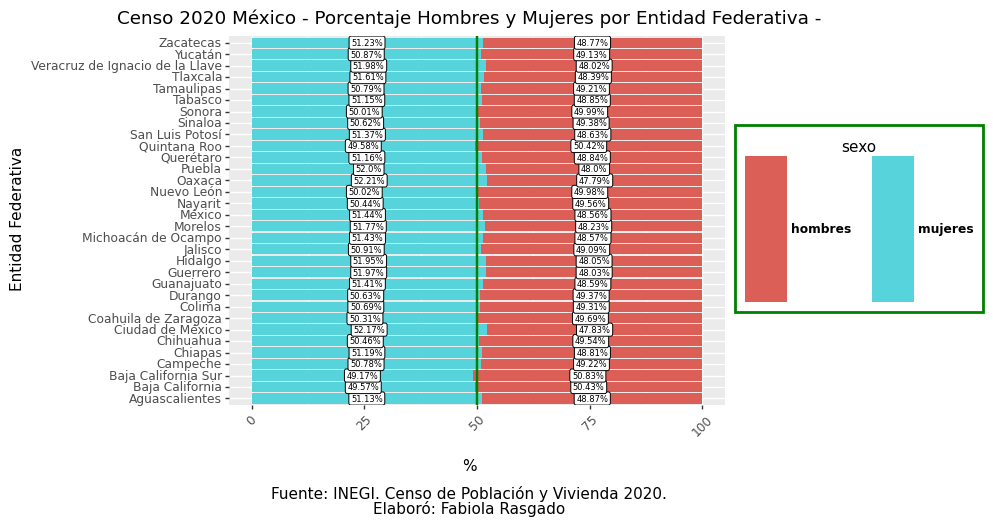

<ggplot: (8750486160361)>

In [ ]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

gg = (ggplot(tab_df)         # defining what data to use
 #+ aes(reorder('nom_ent','value'),'sexo') reorder no existen en python
 + geom_col(aes(x='nom_ent',y='value', fill='sexo'))  #, position='stack'
 + geom_label(aes(x='nom_ent', y='value', label='value'),
              format_string='{}%',
              size=6,
              position=position_stack(vjust=0.5)
              )
  + coord_flip()        # flipping the x- and y-axes
 + geom_hline(yintercept = 50, size=1, color='green', linetype="solid") # solid, dashed, dashdot or dotted. 
+ theme_gray() + theme_xkcd()
+ theme_gray() + theme(axis_text_x=element_text(angle=45))
+ labs(title="Censo 2020 México - Porcentaje Hombres y Mujeres por Entidad Federativa -",
       x='Entidad Federativa', 
       y="\n%\n\nFuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado",
       caption = "Fuente: INEGI. Censo de Población y Vivienda 2020.", 
       text=element_text(weight='bold', color='blue', linespacing=6))   # customizing labels
 + theme(
    legend_position='right',
    legend_direction='horizontal', # affected by the ncol=2
    legend_title_align='center',
    legend_box_margin=5,
    legend_background=element_rect(color='green', size=2, fill='white'),

    legend_box='vertical',

    legend_text=element_text(weight='bold'),

    legend_key_size=30,            # overridden
    legend_key_width=30,
    legend_key_height=105,

    legend_entry_spacing=30,      # overridden
    legend_entry_spacing_x=15,
    legend_entry_spacing_y=5)
)
gg
#ggsave(gg, 'ggplot_h_m_porentidadfed.png',format="png",dpi=600,transparent=False)
#Guardar y mostrar la gráfica
#plt.savefig("h_m_por_entidadfed.png",format="png",dpi=600,transparent=False)
